# Proyecto 2 - Proceso de generación de valor por extración de datos


#Erick Mauricio Lopez Vanegas

Este proyecto esta diseñado para que usted pueda:

1.   Poner en práctica los conocimientos específicos del leguaje Python y las bibliotecas de Pandas, Matplotlib con Seaborn y numpy
2.   Generar una plantilla reutilizable de un proceso de limpieza, consolidación y carga de datos
3.   Aplicar los conocimientos analizando una base de datos del mundo real.

Utilizaremos el dataset superstore que puede encontar en la carpeta de datasets de Google Drive. Este es la información de ventas y ordenes de cuatro años de una tienda en línea y le permitirá hacer análisis de ventas, categorías etc.

Mantenga en mente que algunos errores en carga y limpieza de datos pueden surgir. Su tarea es identificarlos y sobreponerse a ellos.



# Importar Datos e Identificar variables a limpiar

In [1]:
import pandas as pd #Libreria pandas
import matplotlib.pyplot as plt #Libreria Matplotlib
import os #importar directorios

In [2]:
from google.colab import drive #conectar con drive

In [3]:
drive.mount('/content/drive') #montar drive

Mounted at /content/drive


#Ruta Archivos

In [5]:
path = r'/content/drive/MyDrive/DA3/DataSets/superStore' #ruta para los datos
archivos = os.listdir(path) #directorio asignado a variable files
archivos #imprime los archivos que contiene

['superstore_dataset2011-2015-3.csv',
 'superstore_dataset2011-2015-8.csv',
 'superstore_dataset2011-2015-5.csv',
 'superstore_dataset2011-2015-1.csv',
 'superstore_dataset2011-2015-2.csv',
 'superstore_dataset2011-2015-4.csv']

In [6]:
df_store = pd.DataFrame()

In [7]:
for file in archivos: #iteracion de archivos
  df_temporal = pd.read_csv(path + "/"+ file, encoding='latin-1') #agrega un Dataframe temporal que lee la ruta de archivos y la concatena con el nombre del archivo y convirtiendola a latin-1
  df_temporal['file_name'] = file #renombra el campo file_name con el nombre del archivo
  df_store = pd.concat([df_store, df_temporal], ignore_index=True) #concatena el Dataframe df_store con el Df temporal sin indexarlo

In [8]:
df_store.head() #imprime el dataframe df_store

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,file_name
0,7694,MX-2011-157049,13-06-2011,13-06-2011,Same Day,BD-11560,Brendan Dodson,Home Office,Cuajimalpa,Distrito Federal,...,Technology,Copiers,"Canon Fax Machine, High-Speed",631.91364,3,0.002,87.35364,78.28,Critical,superstore_dataset2011-2015-3.csv
1,15772,ES-2011-1276768,13-06-2011,18-06-2011,Standard Class,JO-15145,Jack O'Briant,Corporate,Thonon-les-Bains,Rhône-Alpes,...,Furniture,Bookcases,"Dania Stackable Bookrack, Mobile",437.72400,4,0.100,165.32400,68.34,High,superstore_dataset2011-2015-3.csv
2,10075,US-2011-102288,13-06-2011,17-06-2011,Standard Class,KT-16465,Kean Takahito,Consumer,Presidente Dutra,Maranhão,...,Furniture,Chairs,"Office Star Bag Chairs, Set of Two",215.37600,14,0.600,-231.78400,39.85,High,superstore_dataset2011-2015-3.csv
3,15771,ES-2011-1276768,13-06-2011,18-06-2011,Standard Class,JO-15145,Jack O'Briant,Corporate,Thonon-les-Bains,Rhône-Alpes,...,Furniture,Bookcases,"Sauder Corner Shelving, Metal",264.16800,2,0.100,55.72800,30.14,High,superstore_dataset2011-2015-3.csv
4,27155,IN-2011-51390,13-06-2011,17-06-2011,Standard Class,RB-19705,Roger Barcio,Home Office,Palembang,Sumatera Selatan,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",332.52960,1,0.270,18.21960,30.14,Medium,superstore_dataset2011-2015-3.csv


In [9]:
df_store.nunique() #observando unicos

Row ID            51290
Order ID          25035
Order Date         1430
Ship Date          1464
Ship Mode             4
Customer ID        1590
Customer Name       795
Segment               3
City               3636
State              1094
Country             147
Postal Code         631
Market                7
Region               13
Product ID        10292
Category              3
Sub-Category         17
Product Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping Cost     10037
Order Priority        4
file_name             6
dtype: int64

In [10]:
df_store.columns #columnas de el dataframe df_superstore

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'City', 'State', 'Country',
       'Postal Code', 'Market', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping Cost', 'Order Priority', 'file_name'],
      dtype='object')

# Limpieza de Datos

In [11]:
df_rename = df_store.columns.str.replace(" ", "_") #probando el reemplazo de espacio

In [12]:
df_rename #si funciono

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State', 'Country',
       'Postal_Code', 'Market', 'Region', 'Product_ID', 'Category',
       'Sub-Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority', 'file_name'],
      dtype='object')

In [13]:
df_store.columns = df_store.columns.str.replace(" ", "_", regex=True) #reemplaza todos los espacios en blaco con guion bajo
df_store.columns = df_store.columns.str.replace("-", "_", regex=True) #reemplaza todos los guion medio por guion bajo

In [14]:
df_store.columns #cambios aplicados

Index(['Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode',
       'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State', 'Country',
       'Postal_Code', 'Market', 'Region', 'Product_ID', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority', 'file_name'],
      dtype='object')

In [15]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61550 entries, 0 to 61549
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row_ID          61550 non-null  int64  
 1   Order_ID        61550 non-null  object 
 2   Order_Date      61550 non-null  object 
 3   Ship_Date       61550 non-null  object 
 4   Ship_Mode       61550 non-null  object 
 5   Customer_ID     61550 non-null  object 
 6   Customer_Name   61550 non-null  object 
 7   Segment         61550 non-null  object 
 8   City            61550 non-null  object 
 9   State           61550 non-null  object 
 10  Country         61550 non-null  object 
 11  Postal_Code     11899 non-null  float64
 12  Market          61550 non-null  object 
 13  Region          61550 non-null  object 
 14  Product_ID      61550 non-null  object 
 15  Category        61550 non-null  object 
 16  Sub_Category    61550 non-null  object 
 17  Product_Name    61550 non-null 

In [16]:
df_store['Order_Date'] = df_store.Order_Date.astype('datetime64') #cambiando tipo de dato
df_store['Ship_Date'] = df_store.Ship_Date.astype('datetime64') #cambiando tipo de dato

<ipython-input-16-b9c2a122836c>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_store['Order_Date'] = df_store.Order_Date.astype('datetime64') #cambiando tipo de dato
<ipython-input-16-b9c2a122836c>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_store['Ship_Date'] = df_store.Ship_Date.astype('datetime64') #cambiando tipo de dato


In [17]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61550 entries, 0 to 61549
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row_ID          61550 non-null  int64         
 1   Order_ID        61550 non-null  object        
 2   Order_Date      61550 non-null  datetime64[ns]
 3   Ship_Date       61550 non-null  datetime64[ns]
 4   Ship_Mode       61550 non-null  object        
 5   Customer_ID     61550 non-null  object        
 6   Customer_Name   61550 non-null  object        
 7   Segment         61550 non-null  object        
 8   City            61550 non-null  object        
 9   State           61550 non-null  object        
 10  Country         61550 non-null  object        
 11  Postal_Code     11899 non-null  float64       
 12  Market          61550 non-null  object        
 13  Region          61550 non-null  object        
 14  Product_ID      61550 non-null  object        
 15  Ca

In [18]:
df_store.nunique()

Row_ID            51290
Order_ID          25035
Order_Date         1430
Ship_Date          1464
Ship_Mode             4
Customer_ID        1590
Customer_Name       795
Segment               3
City               3636
State              1094
Country             147
Postal_Code         631
Market                7
Region               13
Product_ID        10292
Category              3
Sub_Category         17
Product_Name       3788
Sales             22995
Quantity             14
Discount             27
Profit            24575
Shipping_Cost     10037
Order_Priority        4
file_name             6
dtype: int64

In [19]:
df_store.isna().sum()

Row_ID                0
Order_ID              0
Order_Date            0
Ship_Date             0
Ship_Mode             0
Customer_ID           0
Customer_Name         0
Segment               0
City                  0
State                 0
Country               0
Postal_Code       49651
Market                0
Region                0
Product_ID            0
Category              0
Sub_Category          0
Product_Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping_Cost         0
Order_Priority        0
file_name             0
dtype: int64

In [20]:
df_store.Postal_Code.duplicated().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of 0        False
1         True
2         True
3         True
4         True
         ...  
61545     True
61546     True
61547     True
61548     True
61549     True
Name: Postal_Code, Length: 61550, dtype: bool>

In [21]:
duplicados = df_store.Postal_Code.drop_duplicates()

In [22]:
duplicados.nunique()

631

In [ ]:
#df_store.Postal_Code.drop_duplicates(inplace=True)

In [23]:
df_store.Postal_Code

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
61545   NaN
61546   NaN
61547   NaN
61548   NaN
61549   NaN
Name: Postal_Code, Length: 61550, dtype: float64

In [24]:
df_store.Postal_Code.nunique()

631

In [25]:
df_store.Postal_Code.isna().sum()

49651

In [26]:
df_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61550 entries, 0 to 61549
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row_ID          61550 non-null  int64         
 1   Order_ID        61550 non-null  object        
 2   Order_Date      61550 non-null  datetime64[ns]
 3   Ship_Date       61550 non-null  datetime64[ns]
 4   Ship_Mode       61550 non-null  object        
 5   Customer_ID     61550 non-null  object        
 6   Customer_Name   61550 non-null  object        
 7   Segment         61550 non-null  object        
 8   City            61550 non-null  object        
 9   State           61550 non-null  object        
 10  Country         61550 non-null  object        
 11  Postal_Code     11899 non-null  float64       
 12  Market          61550 non-null  object        
 13  Region          61550 non-null  object        
 14  Product_ID      61550 non-null  object        
 15  Ca

# Creación de nueva base de datos en Google Drive

In [27]:
df_store.to_csv()

Output hidden; open in https://colab.research.google.com to view.

In [28]:
from google.colab import files

In [29]:
df_store.to_csv('super_store.csv')
files.download('super_store.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [31]:
ruta_archivo = '/content/drive/MyDrive/DA3/DataSets/superStore/SuperStore.csv' #guardar en Drive
with open(ruta_archivo, 'w', encoding = 'utf-8-sig') as f:
  df_store.to_csv(f) #guardar csv a Google drive

# Explorando datos

Conectar a la nueva base de datos

In [32]:
df_superStore = pd.read_csv('/content/drive/MyDrive/DA3/DataSets/superStore/SuperStore.csv', index_col=None)

In [33]:
df_superStore.head()

,Unnamed: 0,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,...,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,file_name
0,0,7694,MX-2011-157049,2011-06-13,2011-06-13,Same Day,BD-11560,Brendan Dodson,Home Office,Cuajimalpa,...,Technology,Copiers,"Canon Fax Machine, High-Speed",631.91364,3,0.002,87.35364,78.28,Critical,superstore_dataset2011-2015-3.csv
1,1,15772,ES-2011-1276768,2011-06-13,2011-06-18,Standard Class,JO-15145,Jack O'Briant,Corporate,Thonon-les-Bains,...,Furniture,Bookcases,"Dania Stackable Bookrack, Mobile",437.72400,4,0.100,165.32400,68.34,High,superstore_dataset2011-2015-3.csv
2,2,10075,US-2011-102288,2011-06-13,2011-06-17,Standard Class,KT-16465,Kean Takahito,Consumer,Presidente Dutra,...,Furniture,Chairs,"Office Star Bag Chairs, Set of Two",215.37600,14,0.600,-231.78400,39.85,High,superstore_dataset2011-2015-3.csv
3,3,15771,ES-2011-1276768,2011-06-13,2011-06-18,Standard Class,JO-15145,Jack O'Briant,Corporate,Thonon-les-Bains,...,Furniture,Bookcases,"Sauder Corner Shelving, Metal",264.16800,2,0.100,55.72800,30.14,High,superstore_dataset2011-2015-3.csv
4,4,27155,IN-2011-51390,2011-06-13,2011-06-17,Standard Class,RB-19705,Roger Barcio,Home Office,Palembang,...,Furniture,Chairs,"Novimex Executive Leather Armchair, Adjustable",332.52960,1,0.270,18.21960,30.14,Medium,superstore_dataset2011-2015-3.csv


# Analizando Categorías, tendencias, medias y creando valor

Su función será crear un "deep dive" que explorara 2 a 4 preguntas de negocios que pueda hacer con los datos: ¿Cuál es el mejor día de la semana de ventas? etc. Como mínimo su análisis debe incluir:

- Comparar dos variables con al menos una segmentación por categoría
- Analizar gráficamente multiples variables numéricas
- Plot charts, Gráficos de tendencia y Barra con su análisis de que significa
- Utilizar las ideas anteriores como sea necesario para cada pregunta de negocio.



#¿Cuál es el mejor día de la semana de ventas?

In [34]:
df_superStore.columns

Index(['Unnamed: 0', 'Row_ID', 'Order_ID', 'Order_Date', 'Ship_Date',
       'Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'City', 'State',
       'Country', 'Postal_Code', 'Market', 'Region', 'Product_ID', 'Category',
       'Sub_Category', 'Product_Name', 'Sales', 'Quantity', 'Discount',
       'Profit', 'Shipping_Cost', 'Order_Priority', 'file_name'],
      dtype='object')

In [35]:
df_superStore.Category.head()

0    Technology
1     Furniture
2     Furniture
3     Furniture
4     Furniture
Name: Category, dtype: object

In [36]:
df_superStore.groupby(['Category']).count().sort_values(['Product_ID'], ascending=False)

,Unnamed: 0,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,City,...,Product_ID,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,file_name
Category,,,,,,,,,,,,,,,,,,,,,
Office Supplies,37494,37494,37494,37494,37494,37494,37494,37494,37494,37494,...,37494,37494,37494,37494,37494,37494,37494,37494,37494,37494
Technology,12196,12196,12196,12196,12196,12196,12196,12196,12196,12196,...,12196,12196,12196,12196,12196,12196,12196,12196,12196,12196
Furniture,11860,11860,11860,11860,11860,11860,11860,11860,11860,11860,...,11860,11860,11860,11860,11860,11860,11860,11860,11860,11860


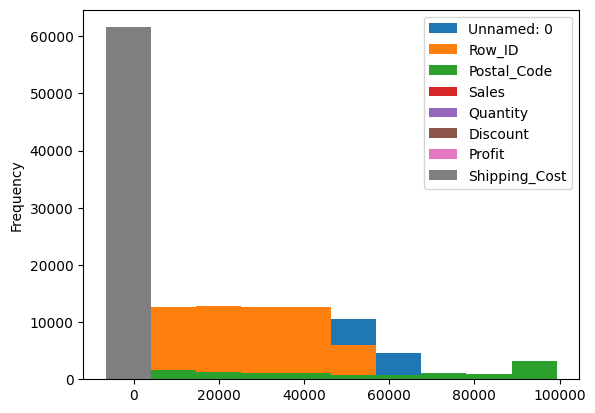

In [37]:
df_superStore.plot(kind ='hist')#, x = 'Quantity', y = 'Discount')
plt.show()

#Plot charts

Categorias y ventas

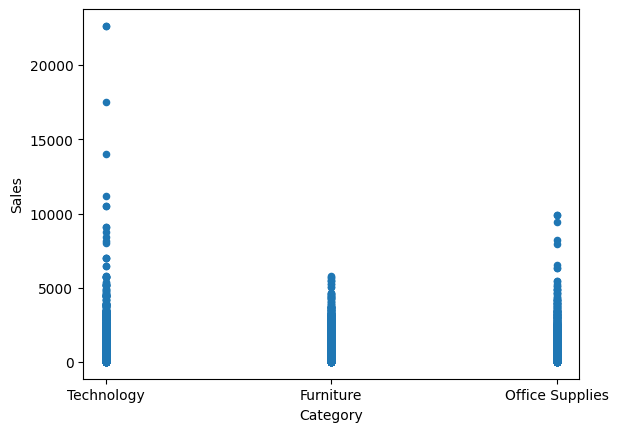

In [38]:
df_superStore.plot(kind = 'scatter', x = 'Category', y = 'Sales')
plt.show()

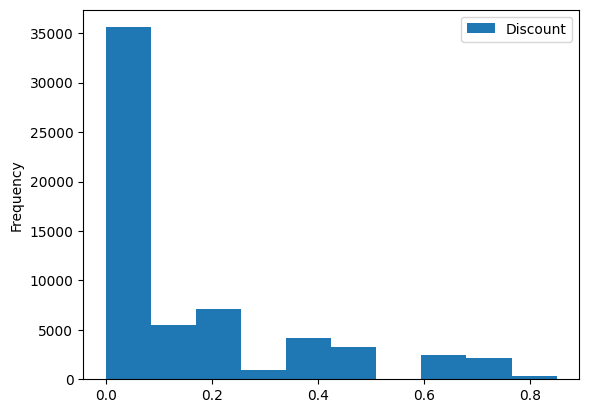

In [39]:
df_superStore.plot(kind = 'hist', x = 'Profit', y = 'Discount')
plt.show()

# Conclusiones

Excelente practica para conocer los diferentes formatos y metodos para explorar y poder conocer los datos, la limpieza y los metodos panda son muy eficaces, muy interesantes
Me encanto trabajar este cuaderno me animo a buscar mas datasets hasta perfeccionar los errores
